# Plot stats for US Modelling group contributions to CMIP6

In [1]:
# Updates
# PJD  5 Apr 2023 - Started
# PJD  6 Apr 2023 - Updated to add cmip6PlusMipLead

## imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os

## define time info

In [3]:
timeNow = datetime.datetime.now()
timeFormat = timeNow.strftime("%y%m%dT%H%M%S")
print("timeFormat:", timeFormat)

timeFormat: 230406T104114


## define input data

In [6]:
labels = ["E3SM", "NASA-GISS", "NCAR", "NOAA-GFDL"]
cmip6Mips = [9, 11, 19, 13]  # CMIP6 values pulled from https://esgf-node.llnl.gov/search/cmip6/
cmip6PlusMips = [1, 3, 2, 3]  # "CMIP6Plus" values pulled from CERESMIP, LESFMIP and RAMIP papers
cmip6PlusMipLead = [np.nan, 1, np.nan, np.nan]  # Number of "CMIP5Plus" MIPs that are being institutionally led
cmip = [1,]*4  # pad a single entry - CMIP "entry card"
pad = [20,]*4  # pad a blank entry

## first plot

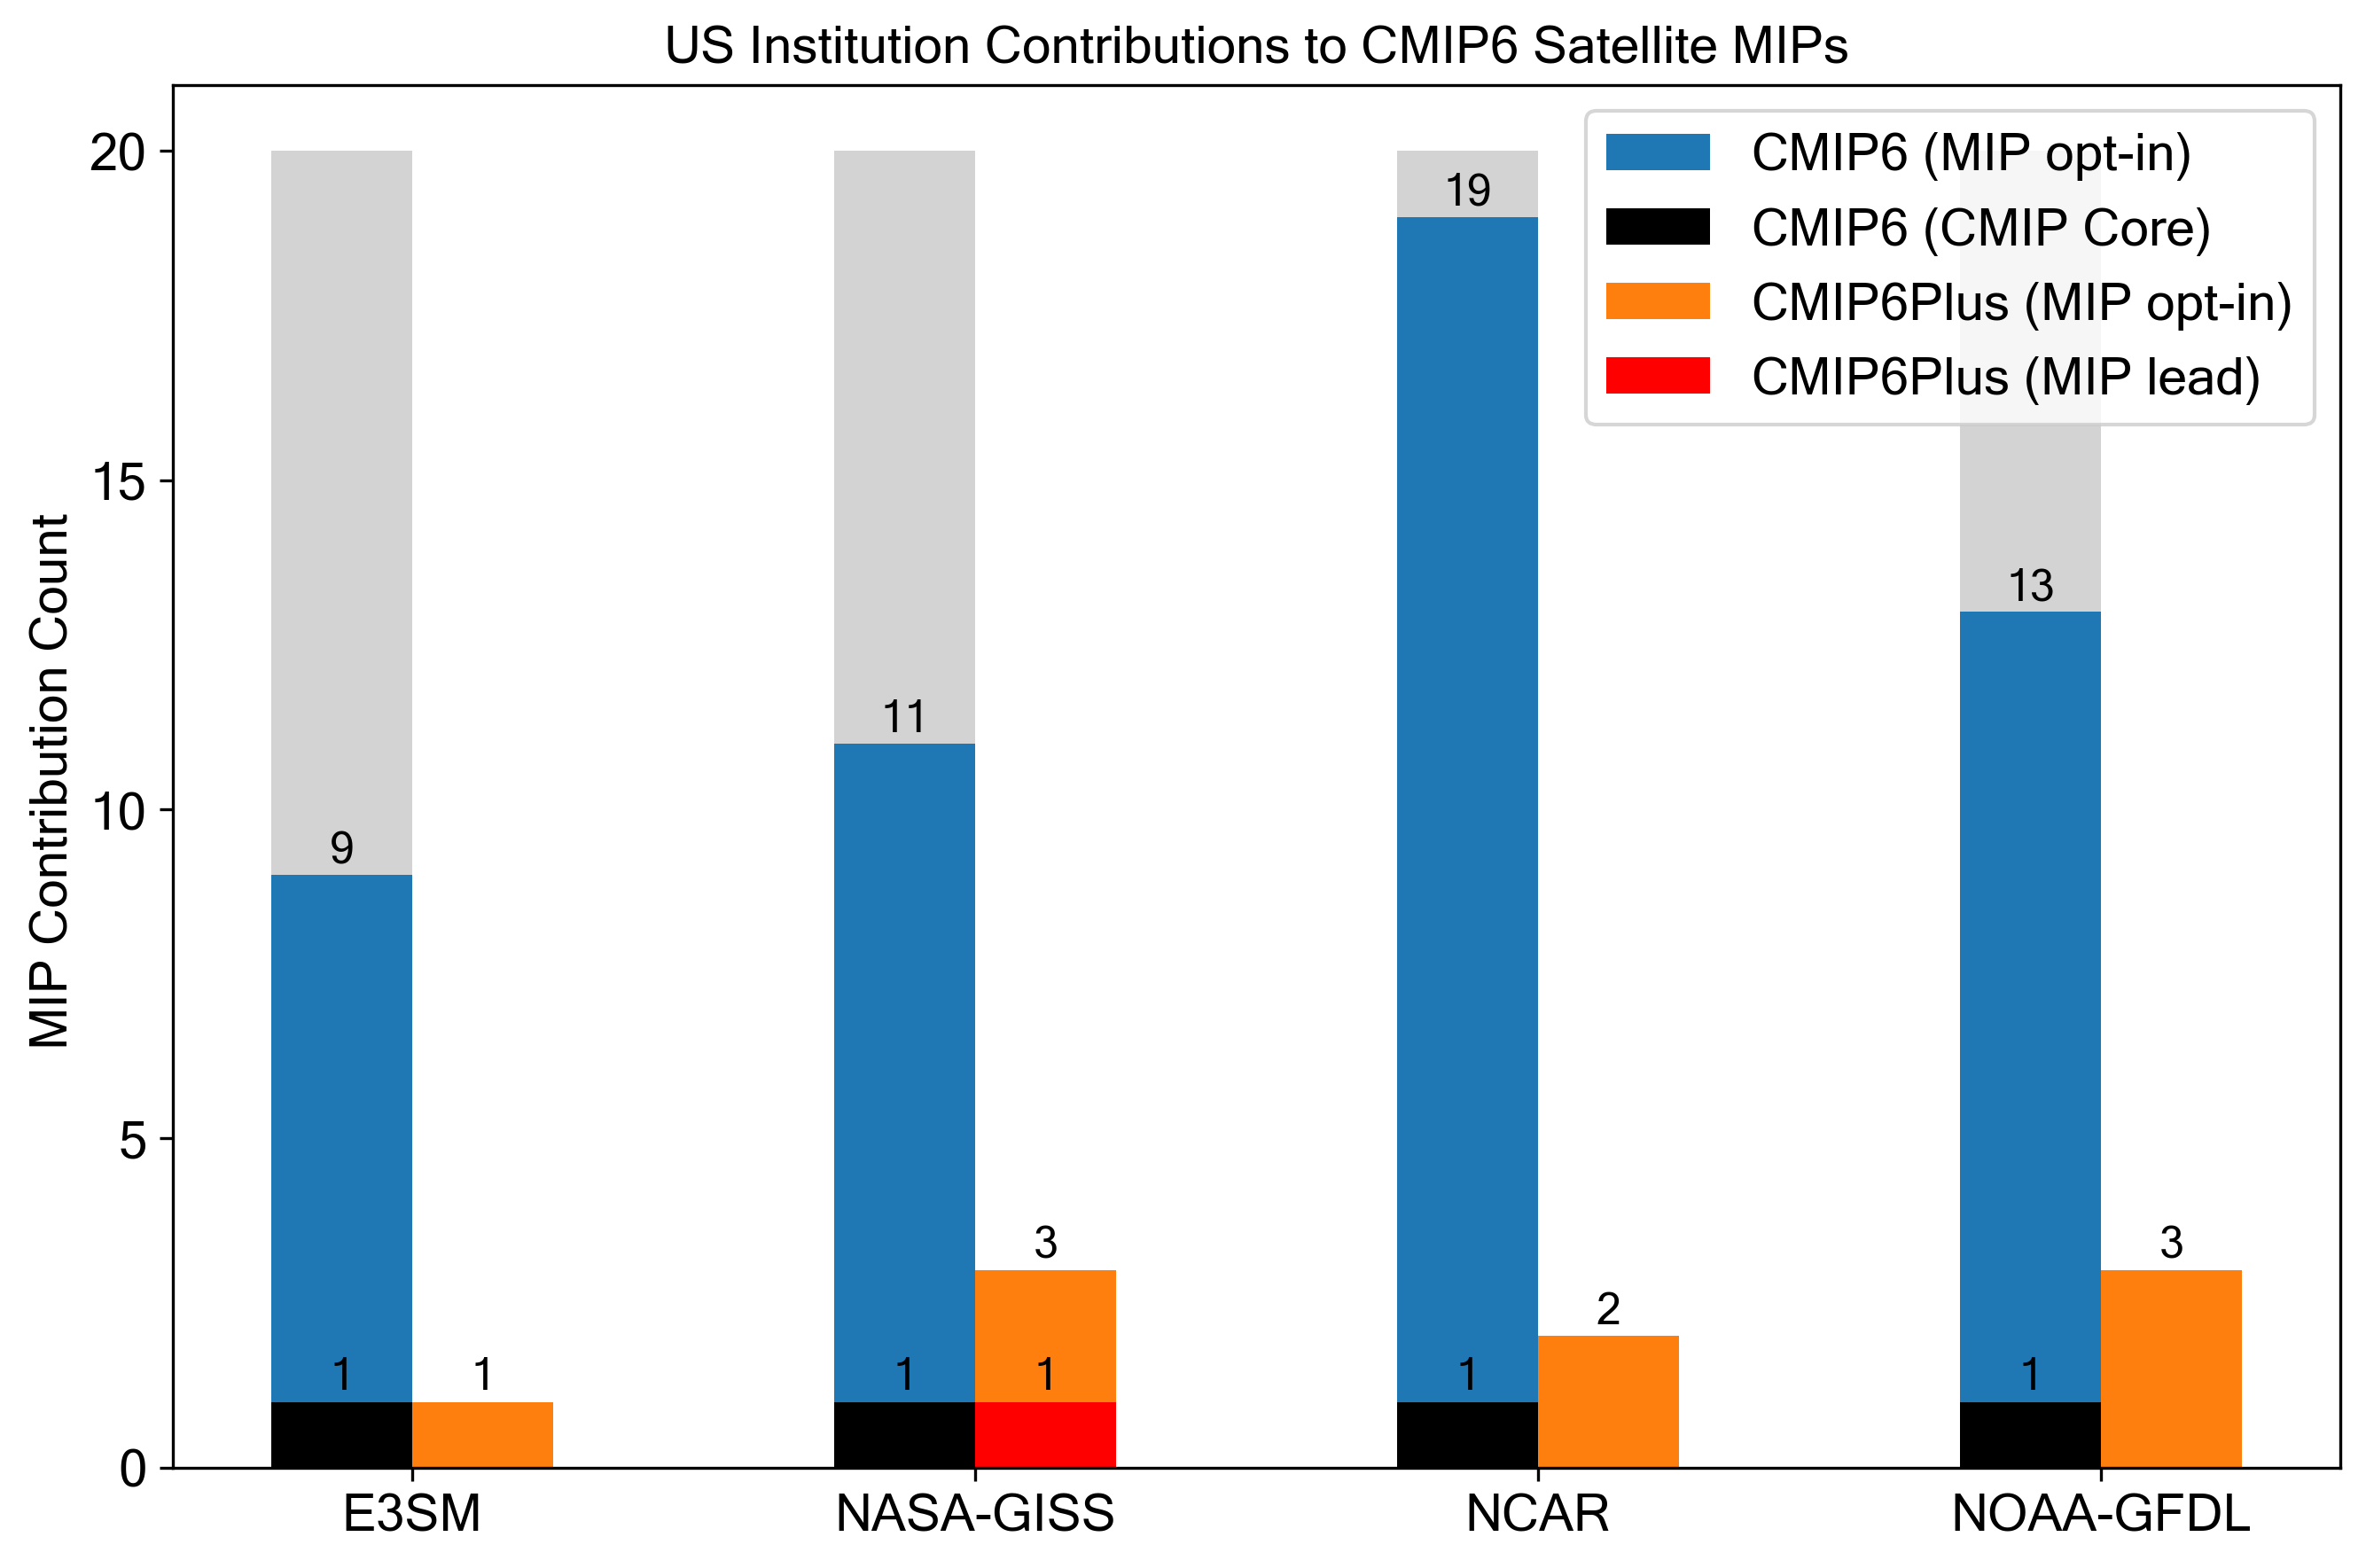

In [7]:
# set inputs
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars
fontsize = 14
fontName = "Microsoft Sans Serif"

# initialize canvas
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# plot
rects0 = ax.bar(x - width*.5, pad, width, label="", color="lightgrey")
rects2 = ax.bar(x - width*.5, cmip6Mips, width, label="CMIP6 (MIP opt-in)")
rects1 = ax.bar(x - width*.5, cmip, width, label="CMIP6 (CMIP Core)", color="black")  # overplot last
rects3 = ax.bar(x + width*.5, cmip6PlusMips, width, label="CMIP6Plus (MIP opt-in)")
rects4 = ax.bar(x + width*.5, cmip6PlusMipLead, width, label="CMIP6Plus (MIP lead)", color="red")

# pretty things up - add text for labels, title and custom x-axis tick labels, etc.
ax.set_title('US Institution Contributions to CMIP6 Satellite MIPs',
             fontname=fontName, fontsize=fontsize)
ax.set_ylabel('MIP Contribution Count', fontname=fontName, fontsize=fontsize)
plt.yticks([0,5,10,15,20], fontname=fontName, fontsize=fontsize)
ax.set_xticks(x, labels, fontname=fontName, fontsize=fontsize)
ax.legend(prop={"family": fontName, "size": fontsize})

# label cleanup
padding = 1
labelSize = 12

# add labels/counts to each bar
ax.bar_label(rects2, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects3, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects1, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects4, padding=padding, fontname=fontName, fontsize=labelSize)

# fill canvas
fig.tight_layout()

# display, save and close
plt.show()
fig.savefig("_".join([timeFormat,"USMIPContribution-Counts.png"]))